# Tumor-Immune Interactions in Random Environment

Meant to be run to reproduce the results of "Brownian motion and stochastic differential equations: modeling and simulation"

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde
from scipy.optimize import minimize_scalar

Import the TumorTissue class. Create an instance with parameters alpha = 10**(-16), beta = 2, theta = 0.1 and a 1000X6000 discretized space and time grid. Model of generic noise environment.

In [7]:
from TumorTissue_Class import tumor_tissue_simulation

parameters = [10**(-16), 2, 0.1, 0.02]
env = tumor_tissue_simulation(params=parameters, model = 'generic', sim_time = 60, x0 = 1.0, dt = 0.01, dx = 0.01, space_grid=10)

# Qualitative study of deterministic model

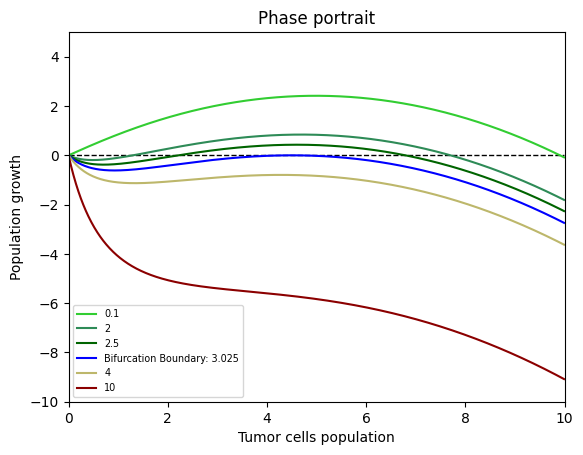

In [8]:
beta_values = [0.1,2.5, 4, 10]
env.ODE_steadystates(beta_values, graph = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


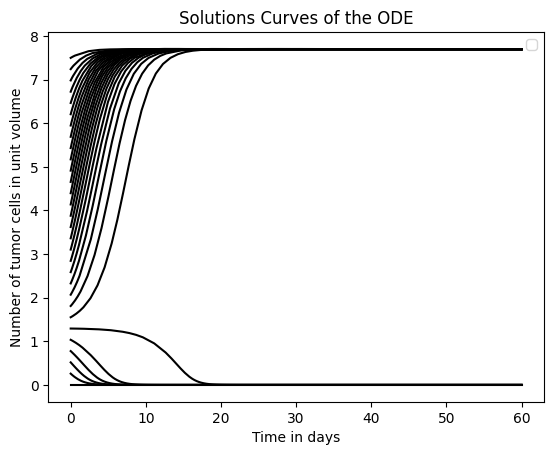

In [9]:
env.ODE_solutions(x0_vals = np.linspace(0,7.5,30))

# Stochastic Model with Generic Environment Noise

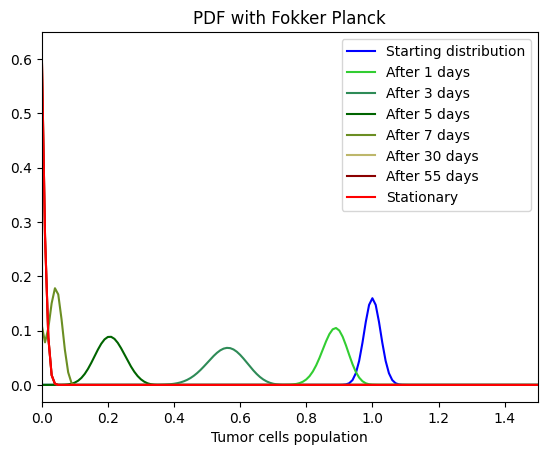

In [10]:
env.solve_Fokk_Planck()

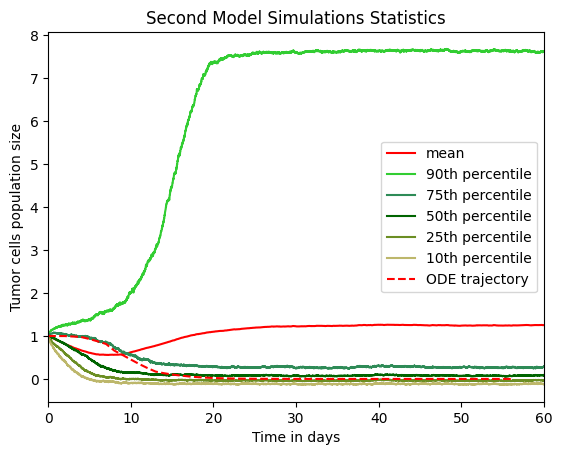

In [11]:
sims = env.simulate_SDE_Milstein(1000,True, True, (90,75,50,25,10))

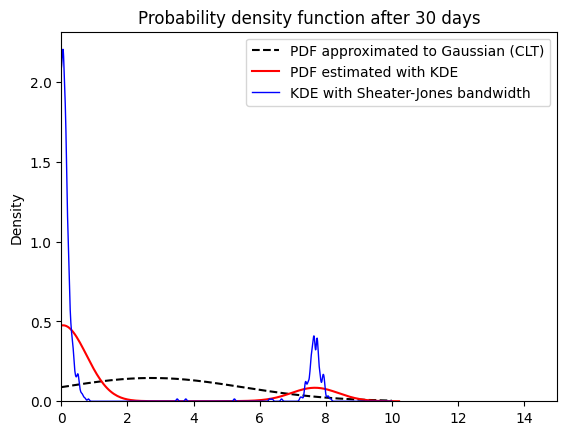

In [12]:
env.MC_density_estimation(30, sims)

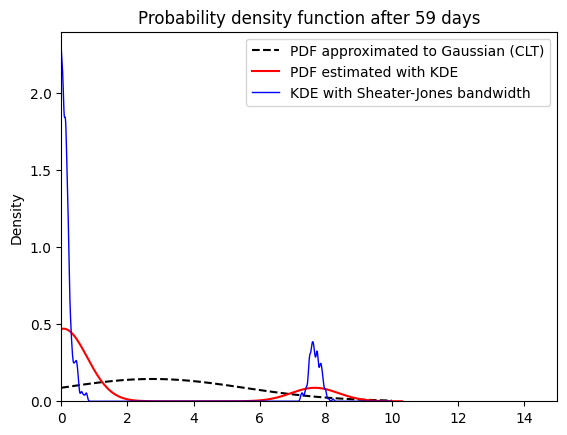

In [13]:
env.MC_density_estimation(59, sims)

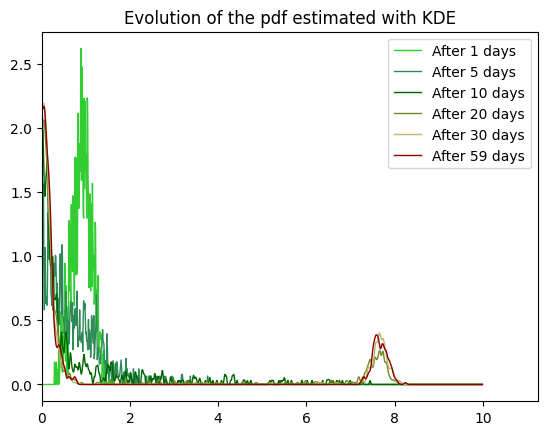

In [14]:
env.density_evolution([1, 5, 10, 20, 30, 59], sims)

# Alternative Model

In [15]:
env2 = tumor_tissue_simulation([10**(-16), 2.0, 0.1, 0.02], 1.0, 'beta', 0.01, 0.01, 60, 10)

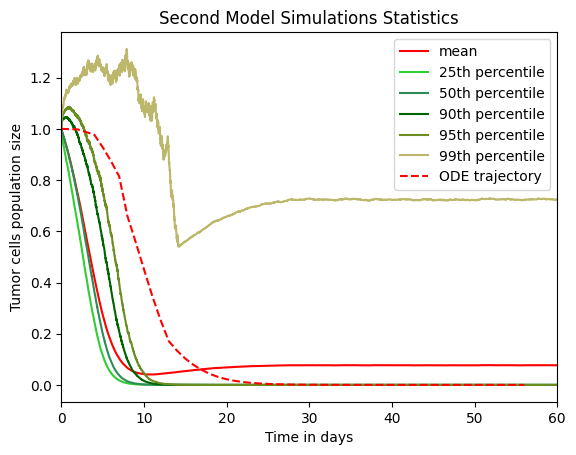

In [17]:
sims2 = env2.simulate_SDE_Milstein(3000, True, True, (25, 50, 90, 95, 99))